In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install torch
#!pip install torchviz
#!pip install graphviz
#!pip install spikingjelly
#%pip install snntorch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from spikingjelly.activation_based import neuron, functional, surrogate, layer

In [2]:
df1 = pd.read_csv('/gpfs/slac/atlas/fs1/d/hjia625/Smart_Pixel/negative-charge/recon8t_d16501.csv')
df2 = pd.read_csv('/gpfs/slac/atlas/fs1/d/hjia625/Smart_Pixel/negative-charge/labels_d16501.csv')

X = df1.values
y = df2.values

X.shape

(12094, 2184)

In [3]:
n = 12094

X = np.reshape(X, (n,8,1,13,21))

In [4]:
df2.drop('n_x', axis=1, inplace=True)
df2.drop('n_y', axis=1, inplace=True)
df2.drop('n_z', axis=1, inplace=True)
df2.drop('number_eh_pairs', axis=1, inplace=True)

print(df2.head())

      x-entry    y-entry  z-entry  y-local        pt  cotAlpha   cotBeta  \
0  -93.675842  27.244566    100.0 -7.79379 -1.547540 -1.020260  0.213543   
1 -177.552887   6.281146    100.0  2.83394 -0.690582 -3.245931 -0.147345   
2   64.063751  10.980962    100.0 -5.61726 -1.880230  0.155249  0.148103   
3   74.409439  -6.026208    100.0 -1.48793 -1.260630  0.704570  0.044000   
4 -125.128357  -1.760185    100.0  6.51676 -1.256090 -1.287240 -0.213035   

   y-midplane  x-midplane  
0   16.567413  -42.662820  
1   13.648415  -15.256313  
2    3.575799   56.301301  
3   -8.226219   39.180964  
4    8.891573  -60.766351  


/tmp/ipykernel_70486/514050635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true_cotAlpha['cotAlpha'], kde=False, bins=50)


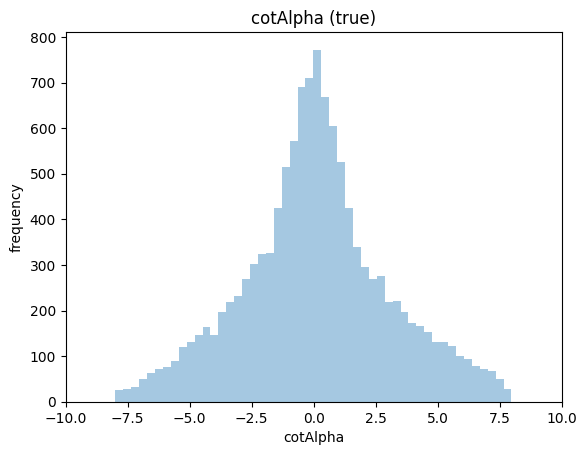

In [5]:
df_true_cotAlpha = pd.DataFrame(df2, columns=['cotAlpha'])
sns.distplot(df_true_cotAlpha['cotAlpha'], kde=False, bins=50)
plt.xlabel('cotAlpha')
plt.xlim([-10,10])
plt.ylabel('frequency')
plt.title("cotAlpha (true)")
plt.savefig('cotAlpha-true.png')

/tmp/ipykernel_70486/1294992759.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true_cotBeta['cotBeta'], kde=False, bins=20)


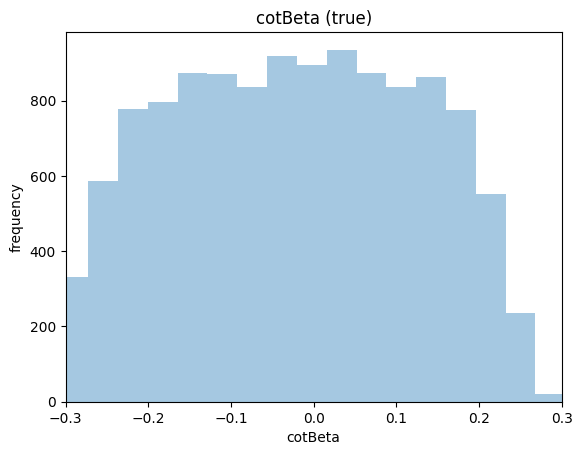

In [6]:
df_true_cotBeta = pd.DataFrame(df2, columns=['cotBeta'])
sns.distplot(df_true_cotBeta['cotBeta'], kde=False, bins=20)
plt.xlim([-0.3,0.3])
plt.xlabel('cotBeta')
plt.ylabel('frequency')
plt.title("cotBeta (true)")
plt.savefig('cotBeta-true.png')

/tmp/ipykernel_70486/2204574428.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true_x['x-entry'], kde=False, bins=40)


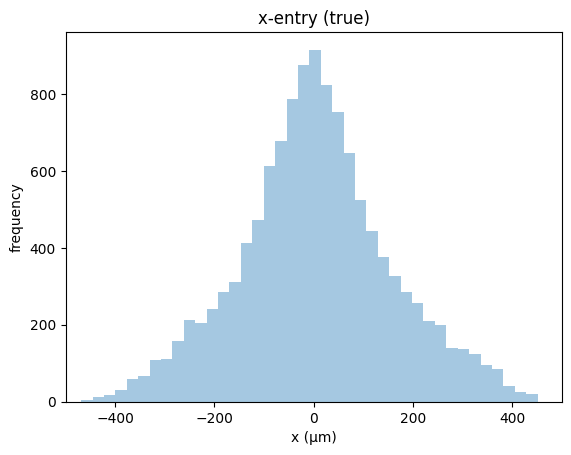

In [7]:
df_true_x = pd.DataFrame(df2, columns=['x-entry'])
sns.distplot(df_true_x['x-entry'], kde=False, bins=40)
plt.xlim([-500,500])
plt.xlabel(r'x (μm)')
plt.ylabel('frequency')
plt.title("x-entry (true)")
plt.savefig('x-entry-true.png')

/tmp/ipykernel_70486/2771896282.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true_y['y-entry'], kde=False, bins=40)


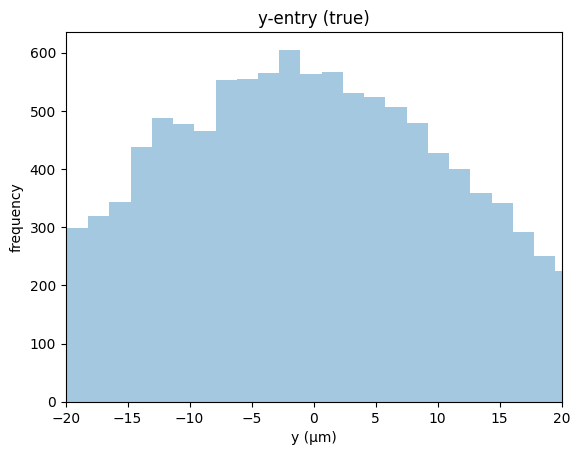

In [8]:
df_true_y = pd.DataFrame(df2, columns=['y-entry'])
sns.distplot(df_true_y['y-entry'], kde=False, bins=40)
plt.xlabel(r'y (μm)')
plt.xlim([-20,20])
plt.ylabel('frequency')
plt.title("y-entry (true)")
plt.savefig('y-entry-true.png')

/tmp/ipykernel_70486/750578867.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_true_z['z-entry'], kde=False, bins=5)


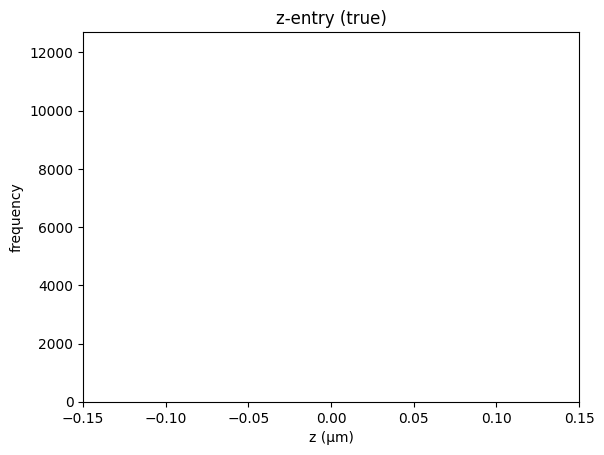

In [9]:
df_true_z = pd.DataFrame(df2, columns=['z-entry'])
sns.distplot(df_true_z['z-entry'], kde=False, bins=5)
plt.xlabel(r'z (μm)')
plt.xlim([-0.15,0.15])
plt.ylabel('frequency')
plt.title("z-entry (true)")
plt.savefig('z-entry-true.png')

In [10]:
# Splitting the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
print(X_train.shape,y_train.shape)
# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_val_torch = torch.tensor(X_val, dtype=torch.float32)
y_val_torch = torch.tensor(y_val, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets for each set
train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=True)

(9675, 8, 1, 13, 21) (9675, 13)


In [11]:
class CNN_LSTM(nn.Module):
    def __init__(self):
        super(CNN_LSTM, self).__init__()

        # Convolutional Blocks
        self.conv_layers = nn.Sequential(
            # First Convolutional Block
            nn.Conv2d(1, 32, kernel_size=3, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Second Convolutional Block
            nn.Conv2d(32, 32, kernel_size=3, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
        )

        # LSTM Layer
        self.lstm = nn.LSTM(input_size=64, hidden_size=32, batch_first=True)

        # Fully Connected Layers
        self.fc_layers = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 13)
        )

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()

        # Apply convolutional layers
        x = x.view(batch_size * timesteps, C, H, W)
        x = self.conv_layers(x)

        # Reshape for LSTM
        _, C, H, W = x.shape
        x = x.view(batch_size, timesteps, -1)

        # LSTM Layer
        lstm_out, _ = self.lstm(x)

        x = lstm_out.reshape(batch_size, -1)

        # Apply the fully connected layers
        x = self.fc_layers(x)
        return x


In [12]:
model = CNN_LSTM()
print(model)

CNN_LSTM(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (lstm): LSTM(64, 32, batch_first=True)
  (fc_layers): Sequential(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=13, bias=True)
  )
)


In [13]:
# Define loss function and optimizer
# criterion = nn.MSELoss()
criterion = nn.HuberLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 50  # Set the number of epochs
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    epoch_loss = 0
    for inputs, targets in train_loader:
        # print(inputs.shape, targets.shape)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()  # Add the batch loss

    # Average loss for this epoch
    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)

    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loop_loss = criterion(outputs, targets)
            val_loss += val_loop_loss.item()
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}')

    
torch.save(model.state_dict(), 'model_weights.pth')

Epoch 1/50, Training Loss: 1749.8054, Validation Loss: 1691.4604
Epoch 2/50, Training Loss: 1514.1632, Validation Loss: 1338.2917
Epoch 3/50, Training Loss: 1171.4233, Validation Loss: 1072.2252
Epoch 4/50, Training Loss: 1032.6505, Validation Loss: 964.8215
Epoch 5/50, Training Loss: 827.7882, Validation Loss: 718.6794
Epoch 6/50, Training Loss: 665.9554, Validation Loss: 526.1925
Epoch 7/50, Training Loss: 560.4906, Validation Loss: 478.4154
Epoch 8/50, Training Loss: 492.1513, Validation Loss: 359.8633
Epoch 9/50, Training Loss: 445.0361, Validation Loss: 374.9868
Epoch 10/50, Training Loss: 408.8653, Validation Loss: 295.1522
Epoch 11/50, Training Loss: 388.3413, Validation Loss: 259.4314
Epoch 12/50, Training Loss: 369.1219, Validation Loss: 217.4553
Epoch 13/50, Training Loss: 355.3800, Validation Loss: 226.3679
Epoch 14/50, Training Loss: 344.0859, Validation Loss: 196.6616
Epoch 15/50, Training Loss: 339.6641, Validation Loss: 193.6174
Epoch 16/50, Training Loss: 332.0422, Vali

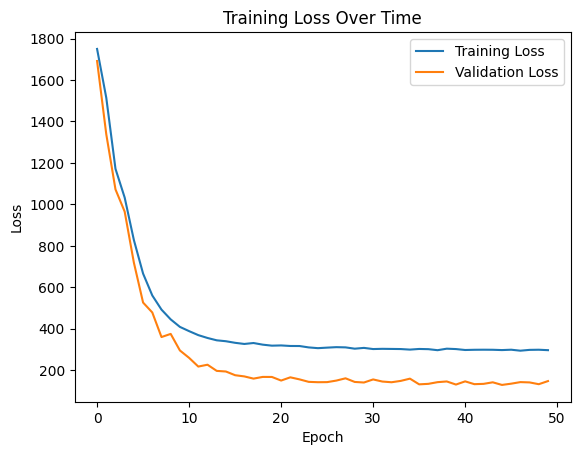

In [14]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

In [15]:

model = CNN_LSTM()  # Replace with your model class
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()  # Set the model to evaluation mode

total_test_loss = 0.0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        loss = criterion(outputs, target)
        total_test_loss += loss.item()  # Sum up batch loss

# Calculate average loss over validation dataset
average_test_loss = total_test_loss / len(test_loader)

print(f'Test Loss: {average_test_loss}')



Test Loss: 149.74156127104888


In [16]:
from spikingjelly.activation_based.ann2snn.converter import Converter
model_converter = Converter(mode='max', dataloader=train_loader)
snn_model = model_converter(model)
print(snn_model)

100%|██████████| 302/302 [01:42<00:00,  2.94it/s]

CNN_LSTM(
  (conv_layers): Module(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2))
  )
  (lstm): LSTM(64, 32, batch_first=True)
  (fc_layers): Module(
    (0): Linear(in_features=256, out_features=64, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=13, bias=True)
  )
  (snn tailor): Module(
    (0): Module(
      (0): VoltageScaler(0.036750)
      (1): IFNode(
        v_threshold=1.0, v_reset=None, detach_reset=False, step_mode=s, backend=torch
        (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
      )
      (2): VoltageScaler(27.210854)
    )
    (1): Module(
      (0): VoltageScaler(0.087340)
      (1): IFNode(
        v_threshold=1.0, v_reset=None, detach_reset=False, step_mode=s, backend=torch
        (surrogate_function): Sigmoid(alpha=4.0, spiking=True)
      )
      (2):

In [17]:
snn_model.eval()  # Set the model to evaluation mode

total_test_loss = 0.0
with torch.no_grad():
    for data, target in test_loader:
        outputs = snn_model(data)
        loss = criterion(outputs, target)
        total_test_loss += loss.item()  # Sum up batch loss

# Calculate average loss over validation dataset
average_test_loss = total_test_loss / len(test_loader)

print(f'Test Loss: {average_test_loss}')

Test Loss: 1842.632423194679
